# Data Loading and Exploration
## Ramy- Model Training

This notebook loads data from BigQuery and explores it for model training.

In [1]:
# required packages
!pip install google-cloud-bigquery pandas numpy matplotlib seaborn scikit-learn db-dtypes


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
from google.cloud import bigquery
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [3]:
# Initialize BigQuery client
client = bigquery.Client()
print(f"✅ Connected to project: {client.project}")

✅ Connected to project: students-group1


In [4]:
# Explore movies table structure
query_explore_movies = """
SELECT *
FROM `master-ai-cloud.MoviePlatform.movies`
LIMIT 5
"""

movies_sample = client.query(query_explore_movies).to_dataframe()
print("=" * 60)
print("MOVIES TABLE STRUCTURE")
print("=" * 60)
print(movies_sample)
print(f"\nColumns: {movies_sample.columns.tolist()}")
print(f"Data types:\n{movies_sample.dtypes}")

MOVIES TABLE STRUCTURE
   movieId                             title              genres
0   126929              Li'l Quinquin (    )  (no genres listed)
1   135460                      Pablo (2012)  (no genres listed)
2   138863  The Big Broadcast of 1936 (1935)  (no genres listed)
3   141305       Round Trip to Heaven (1992)  (no genres listed)
4   141472       The 50 Year Argument (2014)  (no genres listed)

Columns: ['movieId', 'title', 'genres']
Data types:
movieId     Int64
title      object
genres     object
dtype: object


In [7]:
# Explore ratings table structure
query_explore_ratings = """
SELECT *
FROM `master-ai-cloud.MoviePlatform.ratings`
LIMIT 5
"""

ratings_sample = client.query(query_explore_ratings).to_dataframe()
print("=" * 60)
print("RATINGS TABLE STRUCTURE")
print("=" * 60)
print(ratings_sample)
print(f"\nColumns: {ratings_sample.columns.tolist()}")
print(f"Data types:\n{ratings_sample.dtypes}")

RATINGS TABLE STRUCTURE
   userId  movieId  rating   timestamp
0       1      204     0.5  1217895786
1       1      256     0.5  1217895764
2       1      277     0.5  1217895772
3       1      719     0.5  1217895799
4       1    45950     0.5  1217897813

Columns: ['userId', 'movieId', 'rating', 'timestamp']
Data types:
userId         Int64
movieId        Int64
rating       float64
timestamp      Int64
dtype: object


In [8]:
# Get basic statistics about the dataset
# CAREFUL: This processes data and costs money, but it's necessary
query_stats = """
SELECT 
    COUNT(DISTINCT userId) as num_users,
    COUNT(DISTINCT movieId) as num_movies,
    COUNT(*) as num_ratings,
    MIN(rating) as min_rating,
    MAX(rating) as max_rating,
    AVG(rating) as avg_rating,
    STDDEV(rating) as std_rating
FROM `master-ai-cloud.MoviePlatform.ratings`
"""

stats = client.query(query_stats).to_dataframe()
print("=" * 60)
print("DATASET STATISTICS")
print("=" * 60)
print(stats)
print(f"\nTotal Users: {stats['num_users'].values[0]:,}")
print(f"Total Movies: {stats['num_movies'].values[0]:,}")
print(f"Total Ratings: {stats['num_ratings'].values[0]:,}")
print(f"Average Rating: {stats['avg_rating'].values[0]:.2f}")

DATASET STATISTICS
   num_users  num_movies  num_ratings  min_rating  max_rating  avg_rating  \
0        668       10325       105339         0.5         5.0     3.51685   

   std_rating  
0    1.044872  

Total Users: 668
Total Movies: 10,325
Total Ratings: 105,339
Average Rating: 3.52


In [9]:
# Load a sample of ratings for model development
# Starting with 100,000 ratings to keep BigQuery costs low
# You can increase this later if needed

query_ratings = """
SELECT userId, movieId, rating, timestamp
FROM `master-ai-cloud.MoviePlatform.ratings`
LIMIT 100000
"""

print("Loading ratings data... (this may take a minute)")
ratings_df = client.query(query_ratings).to_dataframe()
print(f"✅ Loaded {len(ratings_df):,} ratings")
print(f"Shape: {ratings_df.shape}")
print(f"\nFirst few rows:")
print(ratings_df.head(10))

Loading ratings data... (this may take a minute)
✅ Loaded 100,000 ratings
Shape: (100000, 4)

First few rows:
   userId  movieId  rating   timestamp
0       1      204     0.5  1217895786
1       1      256     0.5  1217895764
2       1      277     0.5  1217895772
3       1      719     0.5  1217895799
4       1    45950     0.5  1217897813
5       1    57949     0.5  1217896004
6       5      110     0.5  1303501027
7       5      231     0.5  1303501088
8       5      500     0.5  1303501086
9       5      592     0.5  1303501032


In [10]:
# Load all movies metadata
query_movies = """
SELECT movieId, title, genres
FROM `master-ai-cloud.MoviePlatform.movies`
"""

print("Loading movies data...")
movies_df = client.query(query_movies).to_dataframe()
print(f"✅ Loaded {len(movies_df):,} movies")
print(f"Shape: {movies_df.shape}")
print(f"\nFirst few rows:")
print(movies_df.head(10))

Loading movies data...
✅ Loaded 10,329 movies
Shape: (10329, 3)

First few rows:
   movieId                                 title              genres
0   126929                  Li'l Quinquin (    )  (no genres listed)
1   135460                          Pablo (2012)  (no genres listed)
2   138863      The Big Broadcast of 1936 (1935)  (no genres listed)
3   141305           Round Trip to Heaven (1992)  (no genres listed)
4   141472           The 50 Year Argument (2014)  (no genres listed)
5   143709                       The Take (2009)  (no genres listed)
6   149532   Marco Polo: One Hundred Eyes (2015)  (no genres listed)
7        9                   Sudden Death (1995)              Action
8       71                      Fair Game (1995)              Action
9      204  Under Siege 2: Dark Territory (1995)              Action


In [11]:
# Explore the loaded data
print("=" * 80)
print("DATA EXPLORATION")
print("=" * 80)

print("\n📊 RATINGS DATA:")
print(f"  • Number of unique users: {ratings_df['userId'].nunique():,}")
print(f"  • Number of unique movies rated: {ratings_df['movieId'].nunique():,}")
print(f"  • Total ratings: {len(ratings_df):,}")
print(f"  • Average rating: {ratings_df['rating'].mean():.2f}")
print(f"  • Median rating: {ratings_df['rating'].median():.2f}")
print(f"  • Rating std dev: {ratings_df['rating'].std():.2f}")

print("\n📈 RATING DISTRIBUTION:")
rating_dist = ratings_df['rating'].value_counts().sort_index()
for rating, count in rating_dist.items():
    print(f"  • {rating}: {count:,} ({count/len(ratings_df)*100:.1f}%)")

print("\n🎬 MOVIES DATA:")
print(f"  • Total movies: {len(movies_df):,}")
print(f"  • Movies with ratings: {ratings_df['movieId'].nunique():,}")
print(f"  • Movies without ratings: {len(movies_df) - ratings_df['movieId'].nunique():,}")

# Check data sparsity
num_users = ratings_df['userId'].nunique()
num_movies = ratings_df['movieId'].nunique()
num_ratings = len(ratings_df)
possible_ratings = num_users * num_movies
sparsity = (1 - num_ratings / possible_ratings) * 100

print(f"\n🔍 DATA SPARSITY:")
print(f"  • Possible ratings: {possible_ratings:,}")
print(f"  • Actual ratings: {num_ratings:,}")
print(f"  • Sparsity: {sparsity:.2f}%")
print(f"  • Density: {100-sparsity:.2f}%")

DATA EXPLORATION

📊 RATINGS DATA:
  • Number of unique users: 668
  • Number of unique movies rated: 10,283
  • Total ratings: 100,000
  • Average rating: 3.44
  • Median rating: 3.50
  • Rating std dev: 1.01

📈 RATING DISTRIBUTION:
  • 0.5: 1,198 (1.2%)
  • 1.0: 3,258 (3.3%)
  • 1.5: 1,567 (1.6%)
  • 2.0: 7,943 (7.9%)
  • 2.5: 5,484 (5.5%)
  • 3.0: 21,729 (21.7%)
  • 3.5: 12,237 (12.2%)
  • 4.0: 28,880 (28.9%)
  • 4.5: 8,187 (8.2%)
  • 5.0: 9,517 (9.5%)

🎬 MOVIES DATA:
  • Total movies: 10,329
  • Movies with ratings: 10,283
  • Movies without ratings: 46

🔍 DATA SPARSITY:
  • Possible ratings: 6,869,044
  • Actual ratings: 100,000
  • Sparsity: 98.54%
  • Density: 1.46%


In [12]:
# Analyze user and movie activity
user_activity = ratings_df.groupby('userId').size()
movie_activity = ratings_df.groupby('movieId').size()

print("=" * 80)
print("ACTIVITY ANALYSIS")
print("=" * 80)

print("\n👥 USER ACTIVITY:")
print(f"  • Min ratings per user: {user_activity.min()}")
print(f"  • Max ratings per user: {user_activity.max()}")
print(f"  • Mean ratings per user: {user_activity.mean():.2f}")
print(f"  • Median ratings per user: {user_activity.median():.0f}")

print("\n🎬 MOVIE ACTIVITY:")
print(f"  • Min ratings per movie: {movie_activity.min()}")
print(f"  • Max ratings per movie: {movie_activity.max()}")
print(f"  • Mean ratings per movie: {movie_activity.mean():.2f}")
print(f"  • Median ratings per movie: {movie_activity.median():.0f}")

# Find most active users
print("\n🔥 TOP 5 MOST ACTIVE USERS:")
top_users = user_activity.nlargest(5)
for user_id, count in top_users.items():
    print(f"  • User {user_id}: {count} ratings")

# Find most rated movies
print("\n⭐ TOP 10 MOST RATED MOVIES:")
top_movies = movie_activity.nlargest(10)
for movie_id, count in top_movies.items():
    movie_title = movies_df[movies_df['movieId'] == movie_id]['title'].values
    if len(movie_title) > 0:
        print(f"  • {movie_title[0]}: {count} ratings")

ACTIVITY ANALYSIS

👥 USER ACTIVITY:
  • Min ratings per user: 5
  • Max ratings per user: 5631
  • Mean ratings per user: 149.70
  • Median ratings per user: 66

🎬 MOVIE ACTIVITY:
  • Min ratings per movie: 1
  • Max ratings per movie: 283
  • Mean ratings per movie: 9.72
  • Median ratings per movie: 3

🔥 TOP 5 MOST ACTIVE USERS:
  • User 668: 5631 ratings
  • User 575: 2797 ratings
  • User 458: 1987 ratings
  • User 232: 1421 ratings
  • User 310: 1287 ratings

⭐ TOP 10 MOST RATED MOVIES:
  • Pulp Fiction (1994): 283 ratings
  • Jurassic Park (1993): 273 ratings
  • Forrest Gump (1994): 272 ratings
  • Shawshank Redemption, The (1994): 261 ratings
  • Silence of the Lambs, The (1991): 251 ratings
  • Star Wars: Episode IV - A New Hope (1977): 241 ratings
  • Fugitive, The (1993): 228 ratings
  • Terminator 2: Judgment Day (1991): 226 ratings
  • Matrix, The (1999): 225 ratings
  • Braveheart (1995): 221 ratings


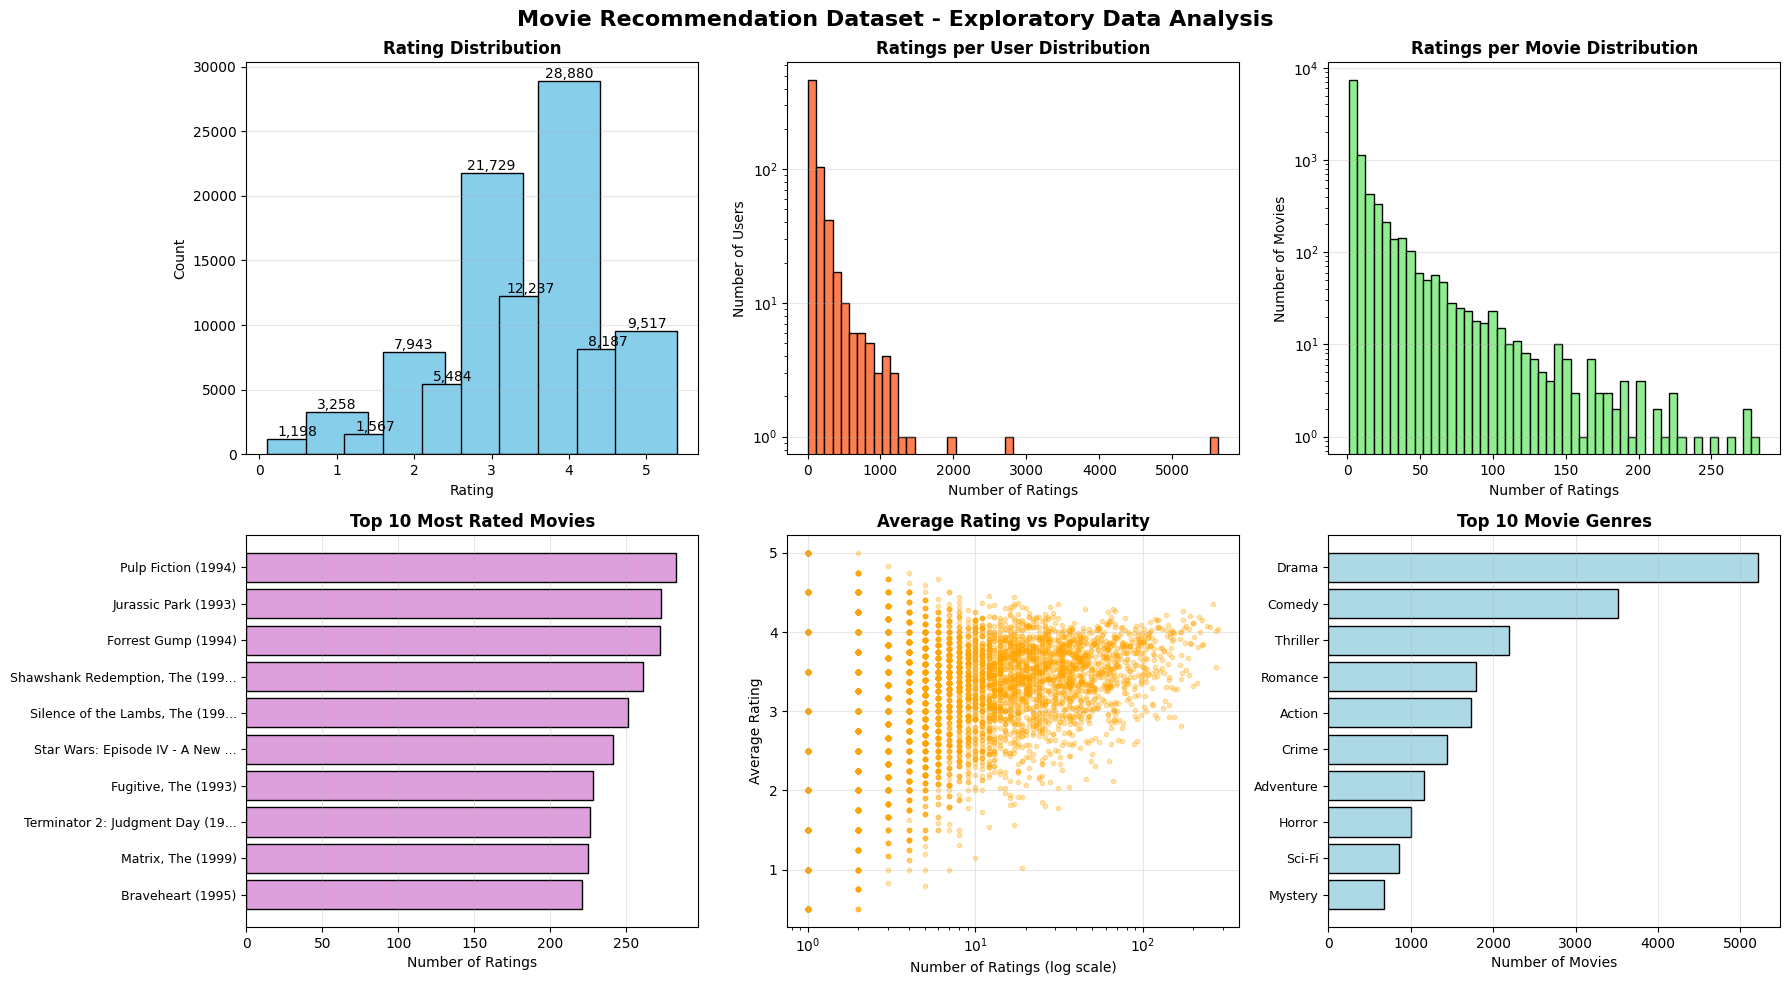


✅ Visualizations complete!


In [13]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Movie Recommendation Dataset - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# 1. Rating distribution
rating_counts = ratings_df['rating'].value_counts().sort_index()
axes[0, 0].bar(rating_counts.index, rating_counts.values, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Rating Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(rating_counts.values):
    axes[0, 0].text(rating_counts.index[i], v, f'{v:,}', ha='center', va='bottom')

# 2. Ratings per user distribution
axes[0, 1].hist(user_activity, bins=50, color='coral', edgecolor='black')
axes[0, 1].set_title('Ratings per User Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Number of Ratings')
axes[0, 1].set_ylabel('Number of Users')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Ratings per movie distribution
axes[0, 2].hist(movie_activity, bins=50, color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Ratings per Movie Distribution', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Number of Ratings')
axes[0, 2].set_ylabel('Number of Movies')
axes[0, 2].set_yscale('log')
axes[0, 2].grid(axis='y', alpha=0.3)

# 4. Top 10 most rated movies
top_10_movies = movie_activity.nlargest(10)
movie_titles = []
for movie_id in top_10_movies.index:
    title = movies_df[movies_df['movieId'] == movie_id]['title'].values
    if len(title) > 0:
        movie_titles.append(title[0][:30] + '...' if len(title[0]) > 30 else title[0])
    else:
        movie_titles.append(f"Movie {movie_id}")

axes[1, 0].barh(range(len(top_10_movies)), top_10_movies.values, color='plum', edgecolor='black')
axes[1, 0].set_yticks(range(len(top_10_movies)))
axes[1, 0].set_yticklabels(movie_titles, fontsize=9)
axes[1, 0].set_title('Top 10 Most Rated Movies', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Number of Ratings')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(axis='x', alpha=0.3)

# 5. Average rating by number of ratings (movie popularity)
movie_stats = ratings_df.groupby('movieId').agg({
    'rating': ['mean', 'count']
}).reset_index()
movie_stats.columns = ['movieId', 'avg_rating', 'num_ratings']

axes[1, 1].scatter(movie_stats['num_ratings'], movie_stats['avg_rating'], 
                   alpha=0.3, s=10, color='orange')
axes[1, 1].set_title('Average Rating vs Popularity', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Number of Ratings (log scale)')
axes[1, 1].set_ylabel('Average Rating')
axes[1, 1].set_xscale('log')
axes[1, 1].grid(alpha=0.3)

# 6. Genre distribution (if genres are available)
if 'genres' in movies_df.columns:
    # Split genres and count them
    all_genres = []
    for genres in movies_df['genres'].dropna():
        all_genres.extend(genres.split('|'))
    
    genre_counts = pd.Series(all_genres).value_counts().head(10)
    
    axes[1, 2].barh(range(len(genre_counts)), genre_counts.values, color='lightblue', edgecolor='black')
    axes[1, 2].set_yticks(range(len(genre_counts)))
    axes[1, 2].set_yticklabels(genre_counts.index, fontsize=9)
    axes[1, 2].set_title('Top 10 Movie Genres', fontsize=12, fontweight='bold')
    axes[1, 2].set_xlabel('Number of Movies')
    axes[1, 2].invert_yaxis()
    axes[1, 2].grid(axis='x', alpha=0.3)
else:
    axes[1, 2].text(0.5, 0.5, 'Genre data not available', 
                    ha='center', va='center', fontsize=12)
    axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("\n✅ Visualizations complete!")

In [14]:
# Check data quality
print("=" * 80)
print("DATA QUALITY CHECK")
print("=" * 80)

print("\n📋 RATINGS DATA:")
print(f"  • Missing values:\n{ratings_df.isnull().sum()}")
print(f"  • Duplicates: {ratings_df.duplicated().sum()}")
print(f"  • Rating range: {ratings_df['rating'].min()} to {ratings_df['rating'].max()}")

print("\n📋 MOVIES DATA:")
print(f"  • Missing values:\n{movies_df.isnull().sum()}")
print(f"  • Duplicates: {movies_df.duplicated().sum()}")

# Check for movies in ratings but not in movies table
movies_in_ratings = set(ratings_df['movieId'].unique())
movies_in_catalog = set(movies_df['movieId'].unique())
missing_movies = movies_in_ratings - movies_in_catalog

print(f"\n⚠️  CONSISTENCY CHECK:")
print(f"  • Movies in ratings but not in catalog: {len(missing_movies)}")
if len(missing_movies) > 0 and len(missing_movies) < 10:
    print(f"  • Missing movie IDs: {missing_movies}")

DATA QUALITY CHECK

📋 RATINGS DATA:
  • Missing values:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
  • Duplicates: 0
  • Rating range: 0.5 to 5.0

📋 MOVIES DATA:
  • Missing values:
movieId    0
title      0
genres     0
dtype: int64
  • Duplicates: 0

⚠️  CONSISTENCY CHECK:
  • Movies in ratings but not in catalog: 0
